In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'

In [3]:
columns = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','salary']

In [4]:
df=pd.read_csv(url,names=columns,sep=',\s')
df.head()

C:\Users\ADMIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
df.shape

(32561, 15)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [8]:
df.fnlwgt=df['fnlwgt'].apply(lambda x :np.log1p(x))
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,11.983778,10.080679,1077.648844,87.303830,40.437456
std,13.640433,0.630738,2.572720,7385.292085,402.960219,12.347429
min,17.000000,9.416216,1.000000,0.000000,0.000000,1.000000
25%,28.000000,11.676981,9.000000,0.000000,0.000000,40.000000
50%,37.000000,12.091542,10.000000,0.000000,0.000000,40.000000
75%,48.000000,12.376035,12.000000,0.000000,0.000000,45.000000
max,90.000000,14.210727,16.000000,99999.000000,4356.000000,99.000000


In [9]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

In [10]:
df.age.unique()

array([39, 50, 38, 53, 28, 37, 49, 52, 31, 42, 30, 23, 32, 40, 34, 25, 43,
       54, 35, 59, 56, 19, 20, 45, 22, 48, 21, 24, 57, 44, 41, 29, 18, 47,
       46, 36, 79, 27, 67, 33, 76, 17, 55, 61, 70, 64, 71, 68, 66, 51, 58,
       26, 60, 90, 75, 65, 77, 62, 63, 80, 72, 74, 69, 73, 81, 78, 88, 82,
       83, 84, 85, 86, 87], dtype=int64)

In [11]:
df.workclass.unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [12]:
df.replace('?',np.NaN,inplace=True)

In [13]:
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
salary               0
dtype: int64

In [14]:
df.workclass.replace('Without-pay','Never-worked',inplace=True)

In [15]:
df.workclass.unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', nan, 'Self-emp-inc', 'Never-worked'], dtype=object)

C:\Users\ADMIN\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='workclass', ylabel='count'>

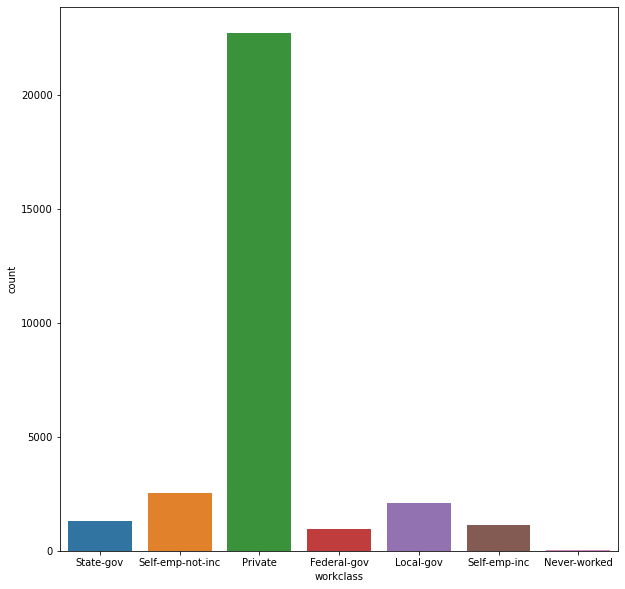

In [16]:
plt.figure(figsize=(10,10))
sns.countplot('workclass',data=df)

In [17]:
df.education.unique()

array(['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college',
       'Assoc-acdm', 'Assoc-voc', '7th-8th', 'Doctorate', 'Prof-school',
       '5th-6th', '10th', '1st-4th', 'Preschool', '12th'], dtype=object)

C:\Users\ADMIN\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='education', ylabel='count'>

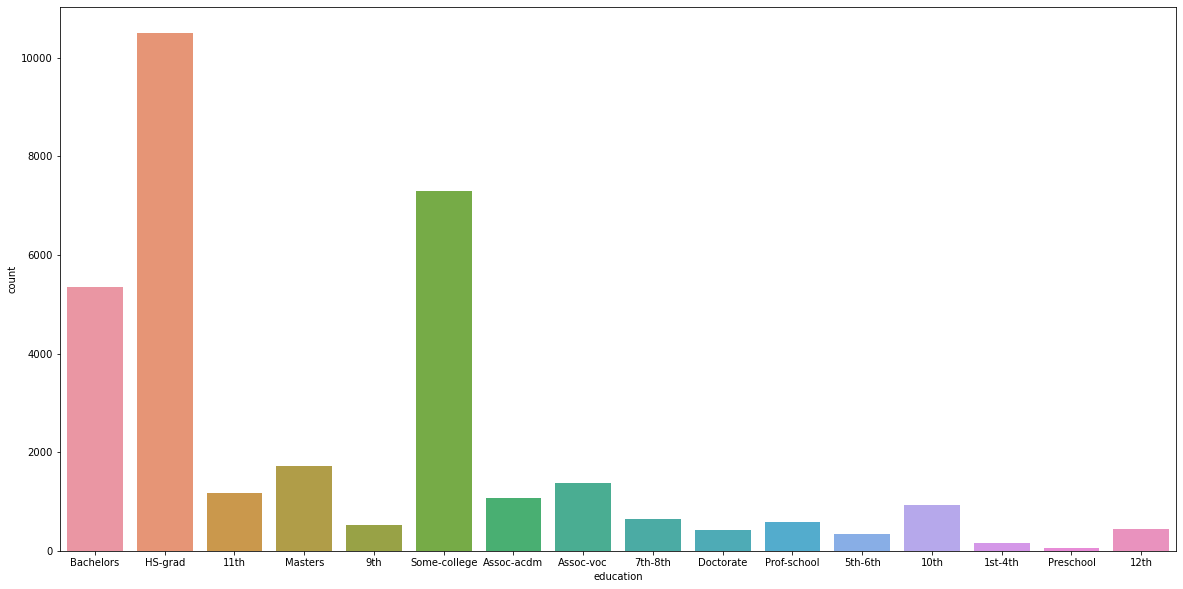

In [18]:
plt.figure(figsize=(20,10))
sns.countplot('education',data=df)

In [19]:
def educ(x):
    if x in ['1st-4th','5th-6th','7th-8th','9th','10th']:
        return 'HighSchool'
    elif x in ['11th','12th']:
        return 'HS-grad'
    else:
        return x

In [20]:
df.education=df.education.apply(educ)

In [21]:
df.education.unique()

array(['Bachelors', 'HS-grad', 'Masters', 'HighSchool', 'Some-college',
       'Assoc-acdm', 'Assoc-voc', 'Doctorate', 'Prof-school', 'Preschool'],
      dtype=object)

In [22]:
df.education.replace(['Assoc-acdm','Assoc-voc'],'Associates',inplace=True)

In [23]:
df.education.unique()

array(['Bachelors', 'HS-grad', 'Masters', 'HighSchool', 'Some-college',
       'Associates', 'Doctorate', 'Prof-school', 'Preschool'],
      dtype=object)

C:\Users\ADMIN\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='education', ylabel='count'>

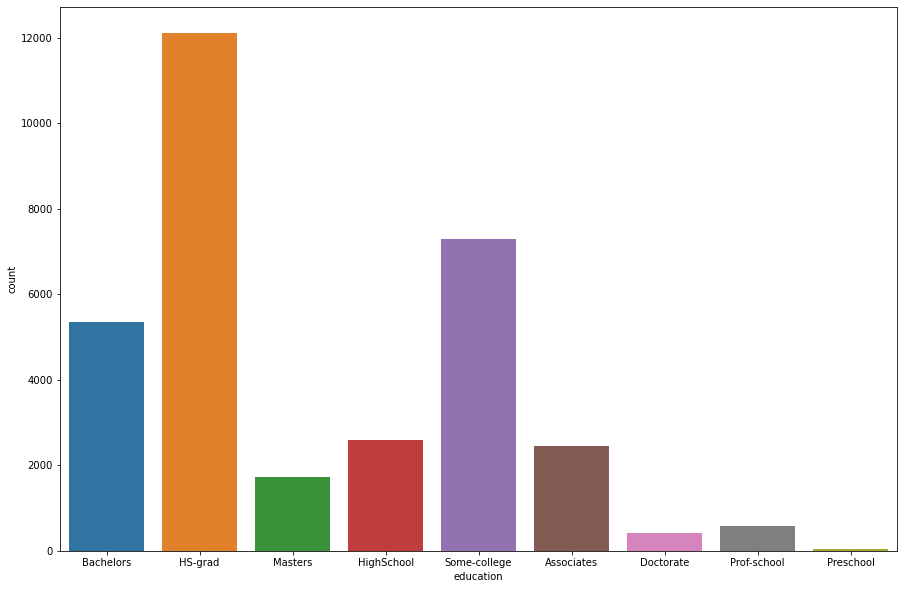

In [24]:
plt.figure(figsize=(15,10))
sns.countplot('education',data=df)

In [25]:
df.salary.unique()

array(['<=50K', '>50K'], dtype=object)

In [26]:
df.salary.replace({'<=50K':0,'>50K':1},inplace=True)

C:\Users\ADMIN\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='salary', ylabel='count'>

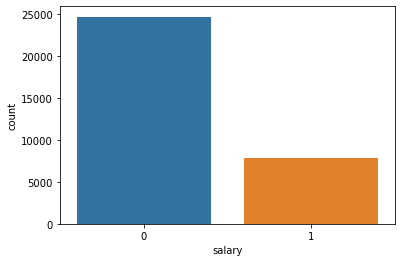

In [27]:
sns.countplot('salary',data=df)

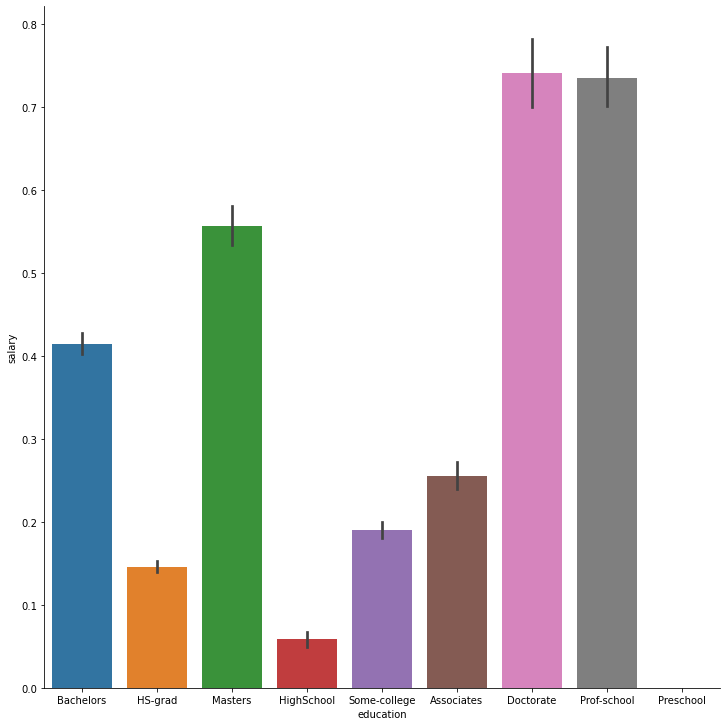

In [28]:
sns.catplot(x='education',y='salary',data=df,kind='bar',height=10)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32561 non-null  int64  
 1   workclass       30725 non-null  object 
 2   fnlwgt          32561 non-null  float64
 3   education       32561 non-null  object 
 4   education-num   32561 non-null  int64  
 5   marital-status  32561 non-null  object 
 6   occupation      30718 non-null  object 
 7   relationship    32561 non-null  object 
 8   race            32561 non-null  object 
 9   sex             32561 non-null  object 
 10  capital-gain    32561 non-null  int64  
 11  capital-loss    32561 non-null  int64  
 12  hours-per-week  32561 non-null  int64  
 13  native-country  31978 non-null  object 
 14  salary          32561 non-null  int64  
dtypes: float64(1), int64(6), object(8)
memory usage: 3.7+ MB


In [30]:
df.education.unique()

array(['Bachelors', 'HS-grad', 'Masters', 'HighSchool', 'Some-college',
       'Associates', 'Doctorate', 'Prof-school', 'Preschool'],
      dtype=object)

In [31]:
df.education.replace(['Preschool','HighSchool','HS-grad','Associates','Some-college','Bachelors','Prof-school','Masters','Doctorate'],[1,2,3,4,5,6,7,8,9],inplace=True)

In [32]:
df.education.unique()

array([6, 3, 8, 2, 5, 4, 9, 7, 1], dtype=int64)

In [33]:
df.drop('education-num',axis=1,inplace=True)

In [34]:
df['marital-status'].value_counts()

Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital-status, dtype: int64

In [35]:
df['marital-status'].replace(['Married-civ-spouse','Married-AF-spouse'],'Married',inplace=True)

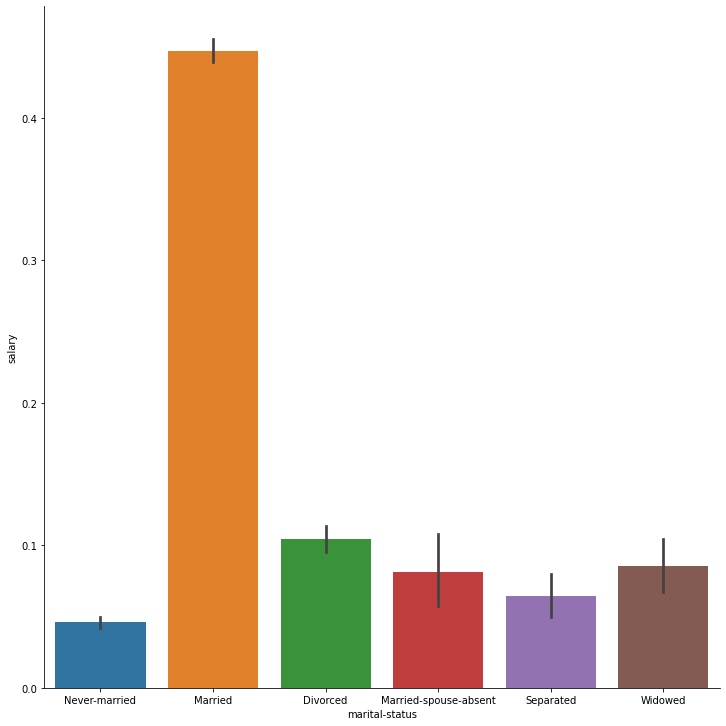

In [36]:
sns.catplot(x='marital-status',y='salary',data=df,height=10,kind='bar')

In [37]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'salary'],
      dtype='object')

In [38]:
df.occupation.value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'Adm-clerical'),
  Text(1, 0, 'Exec-managerial'),
  Text(2, 0, 'Handlers-cleaners'),
  Text(3, 0, 'Prof-specialty'),
  Text(4, 0, 'Other-service'),
  Text(5, 0, 'Sales'),
  Text(6, 0, 'Craft-repair'),
  Text(7, 0, 'Transport-moving'),
  Text(8, 0, 'Farming-fishing'),
  Text(9, 0, 'Machine-op-inspct'),
  Text(10, 0, 'Tech-support'),
  Text(11, 0, 'Protective-serv'),
  Text(12, 0, 'Armed-Forces'),
  Text(13, 0, 'Priv-house-serv')])

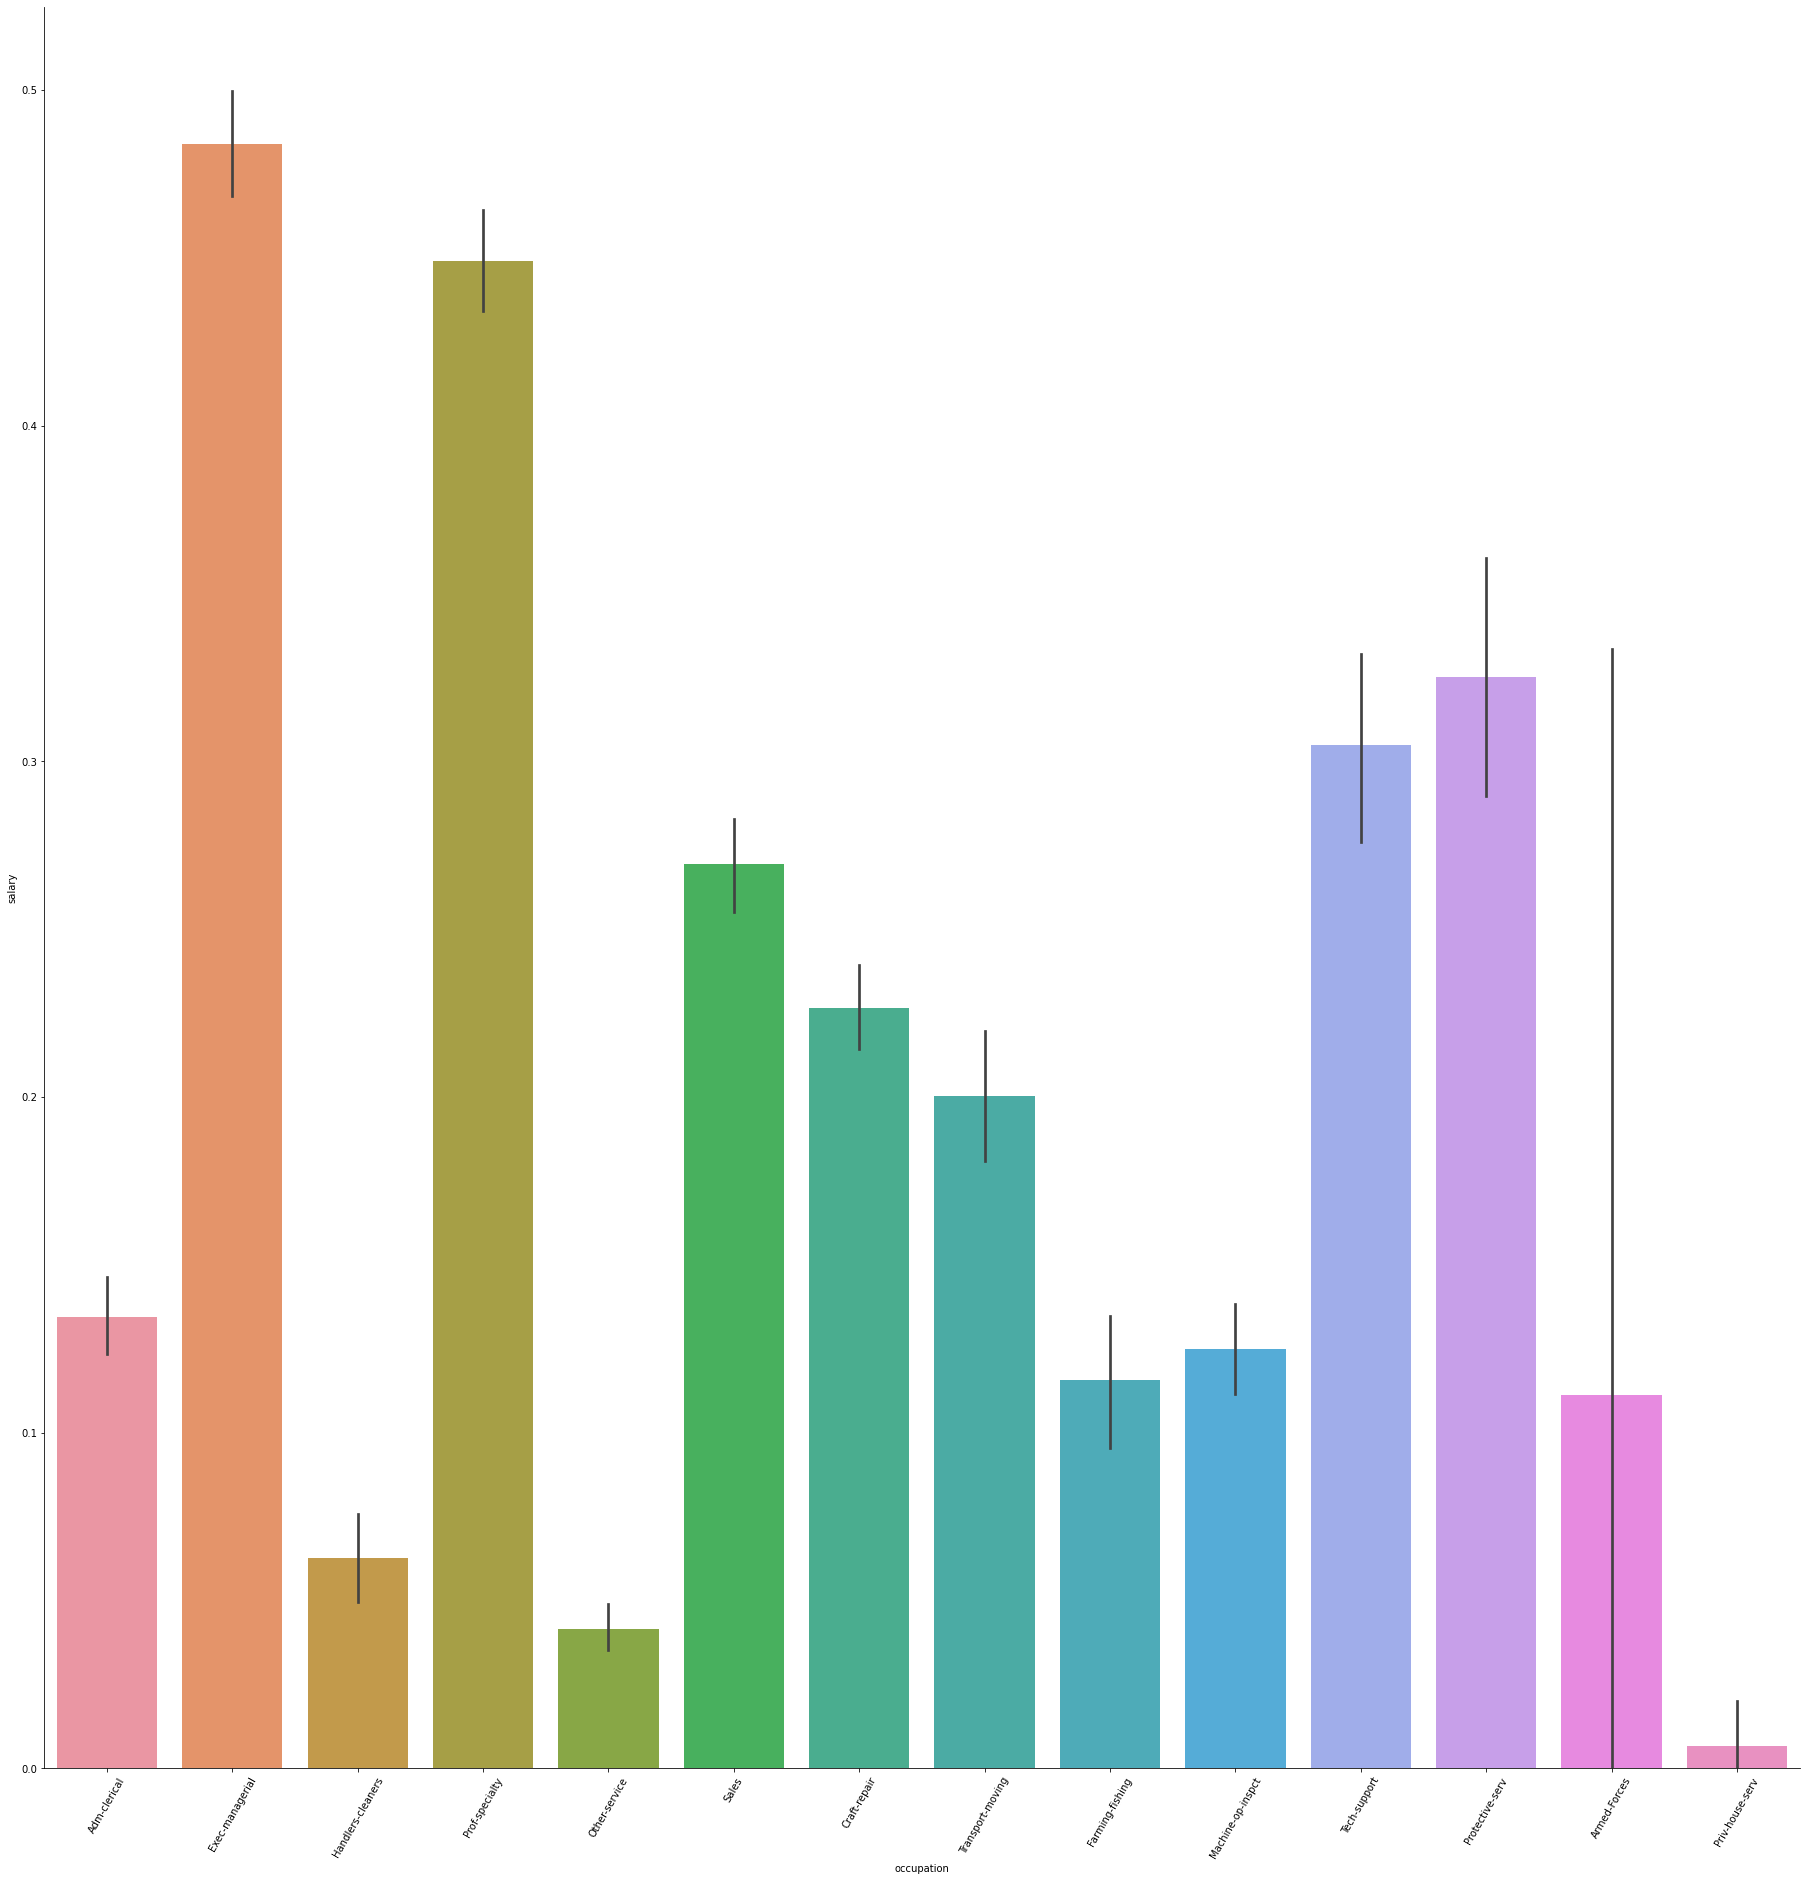

In [39]:
sns.catplot(x='occupation',y='salary',data=df,kind='bar',height=25)
plt.xticks(rotation=60)

In [40]:
df.occupation.replace('Armed-Forces','Other-service',inplace=True)

In [41]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'salary'],
      dtype='object')

In [42]:
df.relationship.value_counts()

Husband           13193
Not-in-family      8305
Own-child          5068
Unmarried          3446
Wife               1568
Other-relative      981
Name: relationship, dtype: int64

In [43]:
df.race.value_counts()

White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: race, dtype: int64

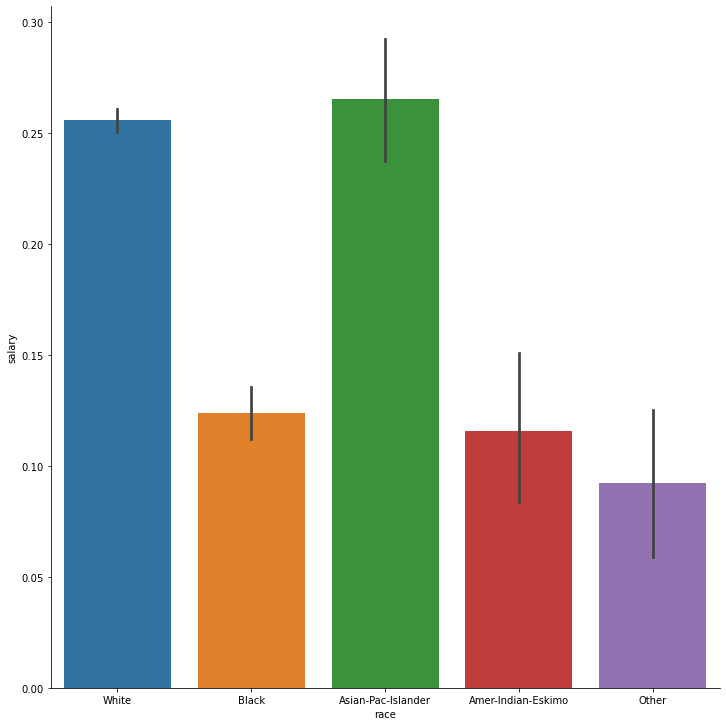

In [44]:
sns.catplot(x='race',y='salary',data=df,height=10,kind='bar')

In [45]:
df.sex.value_counts()

Male      21790
Female    10771
Name: sex, dtype: int64

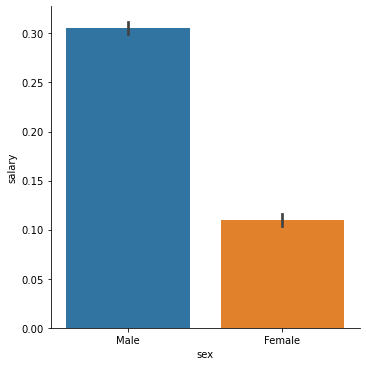

In [46]:
sns.catplot(x='sex',y='salary',data=df,kind='bar')

In [47]:
df['native-country'].value_counts()

United-States                 29170
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                           29
Greece                      

In [48]:
def native(country):
    if country in ['United-States','Canada']:
        return 'North_America'
    elif country in ['Puerto-Rico','El-Salvador','Cuba','Jamaica','Dominican-Republic','Guatemala','Haiti','Nicaragua','Trinadad&Tobago','Honduras']:
        return 'Central_America' 
    elif country in ['Mexico','Columbia','Vietnam','Peru','Ecuador','South','Outlying-US(Guam-USVI-etc)']:
        return 'South_America'
    elif country in ['Germany','England','Italy','Poland','Portugal','Greece','Yugoslavia','France','Ireland','Scotland','Hungary','Holand-Netherlands']:
        return 'EU'
    elif country in ['India','Iran','China','Japan','Thailand','Hong','Cambodia','Laos','Philippines','Taiwan']:
        return 'Asian'
    else:
        return country

In [49]:
df['native-country']=df['native-country'].apply(native)

In [50]:
df['native-country'].value_counts()

North_America      29291
South_America        922
Central_America      640
Asian                604
EU                   521
Name: native-country, dtype: int64

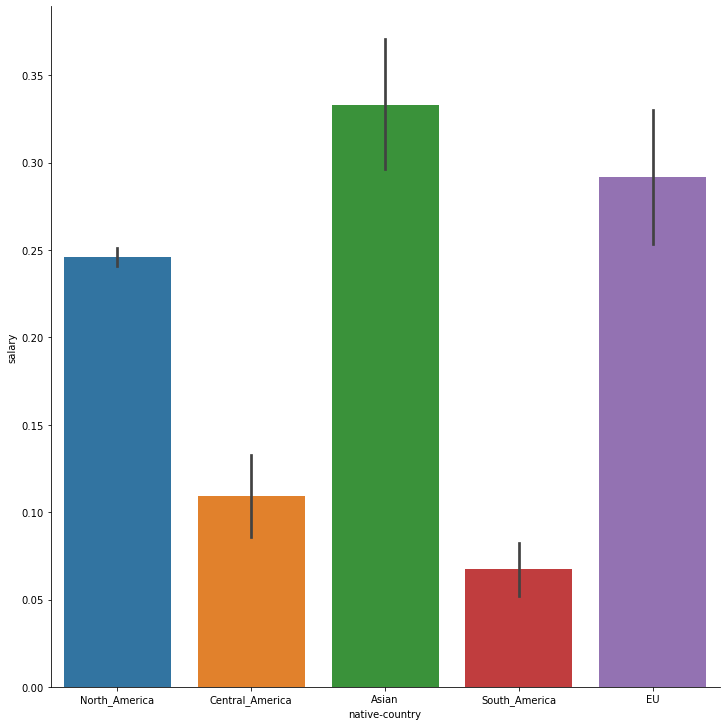

In [51]:
sns.catplot(x='native-country',y='salary',kind='bar',height=10,data=df)

In [52]:
cor=df.corr()
cor

,age,fnlwgt,education,capital-gain,capital-loss,hours-per-week,salary
age,1.000000,-0.060188,0.049719,0.077674,0.057775,0.068756,0.234037
fnlwgt,-0.060188,1.000000,-0.031130,0.003564,-0.005085,-0.024333,-0.001374
education,0.049719,-0.031130,1.000000,0.120584,0.081892,0.121308,0.330593
capital-gain,0.077674,0.003564,0.120584,1.000000,-0.031615,0.078409,0.223329
capital-loss,0.057775,-0.005085,0.081892,-0.031615,1.000000,0.054256,0.150526
hours-per-week,0.068756,-0.024333,0.121308,0.078409,0.054256,1.000000,0.229689
salary,0.234037,-0.001374,0.330593,0.223329,0.150526,0.229689,1.000000


In [53]:
df.drop('fnlwgt',axis=1,inplace=True)

In [54]:
df.isnull().sum()

age                  0
workclass         1836
education            0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
salary               0
dtype: int64

In [55]:
from sklearn.preprocessing import LabelEncoder

In [56]:
def handle_missing(df,column):
    df1=df.copy(deep=True)
    df1=pd.get_dummies(df1.drop(column,axis=1))
    df1=pd.concat([df1,df[column]],axis=1)
    test_data=df1[df1[column].isnull()]
    df1.dropna(inplace=True)
    x_miss_train=df1.drop(column,axis=1)
    x_miss_test=test_data.drop(column,axis=1)
    y_miss_train=df1[column]
    y_miss_test=test_data[column]
    dt=DecisionTreeClassifier()
    dt.fit(x_miss_train,y_miss_train)
    y_miss_test=dt.predict(x_miss_test)
    x_miss_test[column]=y_miss_test
    df.loc[df[column].isnull(),column]=y_miss_test

In [57]:
df.isnull().sum()

age                  0
workclass         1836
education            0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
salary               0
dtype: int64

In [58]:
df_miss=df.drop(['occupation','native-country'],axis=1)
handle_missing(df_miss,'workclass')
df.loc[:,'workclass']=df_miss['workclass']

In [59]:
df_miss=df.drop(['native-country'],axis=1)
handle_missing(df_miss,'occupation')
df.loc[:,'occupation']=df_miss['occupation']

In [60]:
handle_missing(df,'native-country')

In [61]:
df.isnull().sum()

age               0
workclass         0
education         0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

In [62]:
df_dumm=pd.get_dummies(df,drop_first=True)
df_dumm.head()

,age,education,capital-gain,capital-loss,hours-per-week,salary,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male,native-country_Central_America,native-country_EU,native-country_North_America,native-country_South_America
0,39,6,2174,0,40,0,0,0,0,0,...,0,0,0,0,1,1,0,0,1,0
1,50,6,0,0,13,0,0,0,0,0,...,0,0,0,0,1,1,0,0,1,0
2,38,3,0,0,40,0,0,0,1,0,...,0,0,0,0,1,1,0,0,1,0
3,53,3,0,0,40,0,0,0,1,0,...,0,0,1,0,0,1,0,0,1,0
4,28,6,0,0,40,0,0,0,1,0,...,1,0,1,0,0,0,1,0,0,0


In [63]:
X=df_dumm.drop('salary',axis=1)
y=df_dumm['salary']

In [64]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=45)

In [84]:
from xgboost import XGBClassifier

In [215]:
xgb=XGBClassifier()

In [216]:
xgb.fit(x_train,y_train)

XGBClassifier()

In [217]:
xgb.score(x_train,y_train)

0.867014742014742

In [218]:
param_grid={
    ' learning_rate':[1,0.5,0.1,0.01,0.001],
    'max_depth': [3,5,7,9,11,15],
    'n_estimators':[10,50,100,200,300]   
}

In [83]:
from sklearn.model_selection import GridSearchCV

In [220]:
grid_search=GridSearchCV(xgb,param_grid=param_grid,cv=3,n_jobs=-1,verbose=3)

In [221]:
grid_search.fit(x_train,y_train)

Fitting 3 folds for each of 150 candidates, totalling 450 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   59.9s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed: 13.3min
[Parallel(n_jobs=-1)]: Done 450 out of 450 | elapsed: 21.6min finished


GridSearchCV(cv=3, estimator=XGBClassifier(), n_jobs=-1,
             param_grid={' learning_rate': [1, 0.5, 0.1, 0.01, 0.001],
                         'max_depth': [3, 5, 7, 9, 11, 15],
                         'n_estimators': [10, 50, 100, 200, 300]},
             verbose=3)

In [222]:
grid_search.best_params_

{' learning_rate': 1, 'max_depth': 5, 'n_estimators': 200}

In [85]:
xgb_tuned=XGBClassifier(learning_rate=1,max_depth=5,n_estimators=200)

In [86]:
xgb_tuned.fit(x_train,y_train)

XGBClassifier(learning_rate=1, max_depth=5, n_estimators=200)

In [87]:
xgb_tuned.score(x_train,y_train)

0.9314671814671814

In [88]:
y_pred_xgb=xgb_tuned.predict(x_test)

In [89]:
print("Accuracy score is : ",accuracy_score(y_test,y_pred_xgb))
print('-'*50)
print("Classification report : ")
print(classification_report(y_test,y_pred_xgb))
print('-'*50)
print("Confusion matrix : ")
print(confusion_matrix(y_test,y_pred_xgb))

Accuracy score is :  0.8588391851776026
--------------------------------------------------
Classification report : 
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      7415
           1       0.74      0.65      0.69      2354

    accuracy                           0.86      9769
   macro avg       0.81      0.79      0.80      9769
weighted avg       0.85      0.86      0.86      9769

--------------------------------------------------
Confusion matrix : 
[[6866  549]
 [ 830 1524]]


In [90]:
from sklearn.ensemble import AdaBoostClassifier

In [78]:
ada_boost=AdaBoostClassifier(DecisionTreeClassifier(max_depth=1))

In [79]:
ada_boost.fit(x_train,y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1))

In [80]:
ada_boost.score(x_train,y_train)

0.8618374868374868

In [81]:
grid_param_ada={
    'n_estimators':[50,100,150,200,250],
    'learning_rate':[0.1,0.3,0.6,0.7,1]
}

In [84]:
grid_search_ada=GridSearchCV(ada_boost,grid_param_ada,cv=3,n_jobs=-1,verbose=3)

In [85]:
grid_search_ada.fit(x_train,y_train)

Fitting 3 folds for each of 25 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:  2.7min finished


GridSearchCV(cv=3,
             estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1)),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.3, 0.6, 0.7, 1],
                         'n_estimators': [50, 100, 150, 200, 250]},
             verbose=3)

In [87]:
grid_search_ada.best_params_

{'learning_rate': 1, 'n_estimators': 250}

In [91]:
ada_boost_tuned=AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),learning_rate=1,n_estimators=250)

In [92]:
ada_boost_tuned.fit(x_train,y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=1, n_estimators=250)

In [93]:
ada_boost_tuned.score(x_train,y_train)

0.8717971217971218

In [94]:
y_pred_ada=ada_boost_tuned.predict(x_test)

In [95]:
print("Accuracy score is : ",accuracy_score(y_test,y_pred_ada))
print('-'*50)
print("Classification report : ")
print(classification_report(y_test,y_pred_ada))
print('-'*50)
print("Confusion matrix : ")
print(confusion_matrix(y_test,y_pred_ada))

Accuracy score is :  0.8652881564131436
--------------------------------------------------
Classification report : 
              precision    recall  f1-score   support

           0       0.89      0.94      0.91      7415
           1       0.77      0.62      0.69      2354

    accuracy                           0.87      9769
   macro avg       0.83      0.78      0.80      9769
weighted avg       0.86      0.87      0.86      9769

--------------------------------------------------
Confusion matrix : 
[[6989  426]
 [ 890 1464]]


In [65]:
rf=RandomForestClassifier(oob_score=True)

In [66]:
rf.fit(x_train,y_train)

RandomForestClassifier(oob_score=True)

In [67]:
rf.score(x_train,y_train)

0.9788083538083538

In [68]:
rf.oob_score_

0.851000351000351

In [70]:
grid_param_rf={
    'n_estimators':range(100,300,50),
    'max_depth':range(3,1500),
    'min_samples_leaf':range(2,11),
    'min_samples_split':range(2,11),
    'max_features':['auto','sqrt','log2'],
    'max_samples':[0.2,0.5,0.7,1]
}

In [69]:
from sklearn.model_selection import RandomizedSearchCV

In [71]:
random_search_rf=RandomizedSearchCV(rf,grid_param_rf,n_iter=50,n_jobs=-1,verbose=3)

In [72]:
random_search_rf.fit(x_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  9.1min finished


RandomizedSearchCV(estimator=RandomForestClassifier(oob_score=True), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'max_depth': range(3, 1500),
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'max_samples': [0.2, 0.5, 0.7, 1],
                                        'min_samples_leaf': range(2, 11),
                                        'min_samples_split': range(2, 11),
                                        'n_estimators': range(100, 300, 50)},
                   verbose=3)

In [73]:
random_search_rf.best_params_

{'n_estimators': 200,
 'min_samples_split': 4,
 'min_samples_leaf': 2,
 'max_samples': 0.5,
 'max_features': 'log2',
 'max_depth': 370}

In [75]:
rf_tuned=RandomForestClassifier(n_estimators=200,max_features='log2',max_depth=370,min_samples_split=4,max_samples=0.5,min_samples_leaf=2,oob_score=True,random_state=45)

In [76]:
rf_tuned.fit(x_train,y_train)

RandomForestClassifier(max_depth=370, max_features='log2', max_samples=0.5,
                       min_samples_leaf=2, min_samples_split=4,
                       n_estimators=200, oob_score=True, random_state=45)

In [79]:
rf_tuned.oob_score_

0.8642944892944893

In [80]:
y_pred_rf=rf_tuned.predict(x_test)

In [81]:
print("Accuracy score is : ",accuracy_score(y_test,y_pred_rf))
print('-'*50)
print("Classification report : ")
print(classification_report(y_test,y_pred_rf))
print('-'*50)
print("Confusion matrix : ")
print(confusion_matrix(y_test,y_pred_rf))

Accuracy score is :  0.8643668748080663
--------------------------------------------------
Classification report : 
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      7415
           1       0.78      0.60      0.68      2354

    accuracy                           0.86      9769
   macro avg       0.83      0.78      0.80      9769
weighted avg       0.86      0.86      0.86      9769

--------------------------------------------------
Confusion matrix : 
[[7020  395]
 [ 930 1424]]


In [96]:
score=pd.DataFrame({'Model':['RandomForest','AdaBoost','XGBoost'],'Accuracy_score':[accuracy_score(y_test,y_pred_rf),accuracy_score(y_test,y_pred_ada),accuracy_score(y_test,y_pred_xgb)]})
score

,Model,Accuracy_score
0,RandomForest,0.864367
1,AdaBoost,0.865288
2,XGBoost,0.858839
